## We tried to do a full RNN model with only just to explore the outcome and we didn't get good results

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import ast

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
import zipfile

In [2]:
les = pd.read_csv('/Users/meghnahavalgi/Desktop/Neural Modelling/Final Project/2006Fall_2017Spring_GOES_meteo_combined.csv')

In [3]:
column_names = les.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


In [4]:
# Renaming
les.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

les

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,Wind_Chill_F,Heat_Index_F
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48116,2015-03-31,19:00,2015-03-31,19:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",37.0,66.0,...,3500,5500,m,10,990.70,1014.10,1013.50,0.00,29,NC
48117,2015-03-31,20:00,2015-03-31,20:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",36.0,85.0,...,2100,2900,5000,10,991.00,1014.60,1013.90,0.00,NC,NC
48118,2015-03-31,21:00,2015-03-31,21:00,goes15.2015.03.31.2100.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv,"[0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...","[array([ nan, nan, nan, nan, nan, nan, n...",36.0,85.0,...,4600,m,m,10,991.70,1015.00,1014.60,0.00,NC,NC
48119,2015-03-31,22:00,2015-03-31,22:00,goes15.2015.03.31.2200.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2200.v01.nc-var1-t0.csv.csv,"[0.17999999, 0.16749999, 0.16749999, 0.16, 0.1...","[array([ nan, nan, nan, nan, nan...",36.0,81.0,...,4800,5500,m,10,991.70,1014.90,1014.60,0.00,NC,NC


In [5]:
les = les.replace(['m', 'M'], '0')

In [6]:
les = les.drop(['Wind_Chill_F', 'Heat_Index_F', 'File_name_for_1D_lake', 'File_name_for_2D_lake','Lake_data_1D','Lake_data_2D'], axis=1)
les = les.reset_index(drop=True)


In [7]:
les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,2006-10-01,00:00,2006-09-30,00:00,48,86,44,7,150,0,4100,4800,7000,10,984.0,1007.00,1006.80,0.00
1,2006-10-01,01:00,2006-09-30,01:00,48,86,44,8,150,0,6000,0,0,10,983.7,1006.50,1006.40,0.00
2,2006-10-01,02:00,2006-09-30,02:00,48,86,44,6,0,0,5500,11000,0,10,982.7,1005.70,1005.40,0.00
3,2006-10-01,03:00,2006-09-30,03:00,48,86,44,8,150,0,6000,0,0,10,982.0,1005.10,1004.70,0.00
4,2006-10-01,04:00,2006-09-30,04:00,48,89,45,5,0,0,2200,3500,0,8,982.0,1004.90,1004.70,0.02


In [8]:
les.describe()

,Date_UTC,Time_UTC,Date_CST,Time_CST,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
count,48121,48121,48121,48121,47882,47882,47882,47882,47882,47882,47882,47882,47882,47882,47882,47882,47882,47882
unique,2005,24,2016,24,216,170,186,28,37,36,107,90,74,11,355,612,356,40
top,2008-03-26,04:00,2008-03-25,04:00,34,92,21,0,0,0,0,0,0,10,994.00,0,1016.90,0.00
freq,25,2006,25,2006,1305,1744,1210,9634,13835,39334,6532,28806,42480,30145,497,3207,481,41786


In [9]:
les.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48121 entries, 0 to 48120
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date_UTC            48121 non-null  object
 1   Time_UTC            48121 non-null  object
 2   Date_CST            48121 non-null  object
 3   Time_CST            48121 non-null  object
 4   Temp_F              47882 non-null  object
 5   RH_pct              47882 non-null  object
 6   Dewpt_F             47882 non-null  object
 7   Wind_Spd_mph        47882 non-null  object
 8   Wind_Direction_deg  47882 non-null  object
 9   Peak_Wind_Gust_mph  47882 non-null  object
 10  Low_Cloud_Ht_ft     47882 non-null  object
 11  Med_Cloud_Ht_ft     47882 non-null  object
 12  High_Cloud_Ht_ft    47882 non-null  object
 13  Visibility_mi       47882 non-null  object
 14  Atm_Press_hPa       47882 non-null  object
 15  Sea_Lev_Press_hPa   47882 non-null  object
 16  Altimeter_hPa       47

In [10]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values(les)

,Total Null,Percentage Null
Date_UTC,0,0.000000
Time_UTC,0,0.000000
Date_CST,0,0.000000
Time_CST,0,0.000000
Temp_F,239,0.004991
RH_pct,239,0.004991
Dewpt_F,239,0.004991
Wind_Spd_mph,239,0.004991
Wind_Direction_deg,239,0.004991
Peak_Wind_Gust_mph,239,0.004991


In [11]:
len(les)

48121

In [12]:
les = les.loc[(les['Time_UTC'] >= '14:00')
                     & (les['Time_UTC'] <= '21:00')]
les

,Date_UTC,Time_UTC,Date_CST,Time_CST,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
14,2006-10-01,14:00,2006-10-01,14:00,60,49,41,10,270,0,3600,0,0,10,994.7,1017.80,1017.60,0.00
15,2006-10-01,15:00,2006-10-01,15:00,60,47,40,3,0,0,0,0,0,10,994.7,1017.70,1017.60,0.00
16,2006-10-01,16:00,2006-10-01,16:00,59,55,43,6,40,0,0,0,0,10,994.7,1017.80,1017.60,0.00
17,2006-10-01,17:00,2006-10-01,17:00,55,71,46,0,0,0,0,0,0,10,994.7,1017.80,1017.60,0.00
18,2006-10-01,18:00,2006-10-01,18:00,50,82,45,0,0,0,8000,0,0,10,994.7,1017.90,1017.60,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48114,2015-03-31,17:00,2015-03-31,17:00,39.0,54.0,24.0,5,20,0,7000,10000,0,10,989.00,1012.60,1011.90,0.00
48115,2015-03-31,18:00,2015-03-31,18:00,37.0,61.0,25.0,3,330,0,5500,7000,0,10,989.30,1012.80,1012.20,0.00
48116,2015-03-31,19:00,2015-03-31,19:00,37.0,66.0,27.0,11,310,18,3500,5500,0,10,990.70,1014.10,1013.50,0.00
48117,2015-03-31,20:00,2015-03-31,20:00,36.0,85.0,32.0,0,0,0,2100,2900,5000,10,991.00,1014.60,1013.90,0.00


In [13]:
# Using apply method
columns = les.columns
les[columns[4:]]= les[columns[4:]].apply(pd.to_numeric, errors='coerce')

In [14]:
les[columns]

,Date_UTC,Time_UTC,Date_CST,Time_CST,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
14,2006-10-01,14:00,2006-10-01,14:00,60.0,49.0,41.0,10.0,270.0,0.0,3600.0,0.0,0.0,10.0,994.7,1017.8,1017.6,0.0
15,2006-10-01,15:00,2006-10-01,15:00,60.0,47.0,40.0,3.0,0.0,0.0,0.0,0.0,0.0,10.0,994.7,1017.7,1017.6,0.0
16,2006-10-01,16:00,2006-10-01,16:00,59.0,55.0,43.0,6.0,40.0,0.0,0.0,0.0,0.0,10.0,994.7,1017.8,1017.6,0.0
17,2006-10-01,17:00,2006-10-01,17:00,55.0,71.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,994.7,1017.8,1017.6,0.0
18,2006-10-01,18:00,2006-10-01,18:00,50.0,82.0,45.0,0.0,0.0,0.0,8000.0,0.0,0.0,10.0,994.7,1017.9,1017.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48114,2015-03-31,17:00,2015-03-31,17:00,39.0,54.0,24.0,5.0,20.0,0.0,7000.0,10000.0,0.0,10.0,989.0,1012.6,1011.9,0.0
48115,2015-03-31,18:00,2015-03-31,18:00,37.0,61.0,25.0,3.0,330.0,0.0,5500.0,7000.0,0.0,10.0,989.3,1012.8,1012.2,0.0
48116,2015-03-31,19:00,2015-03-31,19:00,37.0,66.0,27.0,11.0,310.0,18.0,3500.0,5500.0,0.0,10.0,990.7,1014.1,1013.5,0.0
48117,2015-03-31,20:00,2015-03-31,20:00,36.0,85.0,32.0,0.0,0.0,0.0,2100.0,2900.0,5000.0,10.0,991.0,1014.6,1013.9,0.0


In [15]:
les['rain'] = 'NONE'

In [16]:
for i,row in les.iterrows():
    if row['Precip_in'] > 0.0 and row['Precip_in'] < 0.05:
        les.at[i, 'rain'] = 'low'
    elif row['Precip_in'] >= 0.05 and row['Precip_in'] < 0.4:
        les.at[i, 'rain'] = 'medium'
    elif row['Precip_in'] >= 0.4:
        les.at[i, 'rain'] = 'high'
    else:
        les.at[i, 'rain'] = 'none'

In [17]:
min_value = les['Precip_in'].min()
max_value = les['Precip_in'].max()

print(f"The value range of the column 'Precip_in' is from {min_value} to {max_value}.")

The value range of the column 'Precip_in' is from 0.0 to 0.86.


In [18]:
low_rain = les[les['rain'] == 'low']
medium_rain = les[les['rain'] == 'medium']
high_rain = les[les['rain'] == 'high']
none_rain = les[les['rain'] == 'none']

print(low_rain.shape[0])
print(medium_rain.shape[0])
print(high_rain.shape[0])
print(none_rain.shape[0])

915
214
3
14908


/var/folders/98/199f8qws47sg36fpzhd66xxh0000gn/T/ipykernel_10450/4124728096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = les.corr(method = 'pearson')


Text(0.5, 1.0, 'Correlation Matrix')

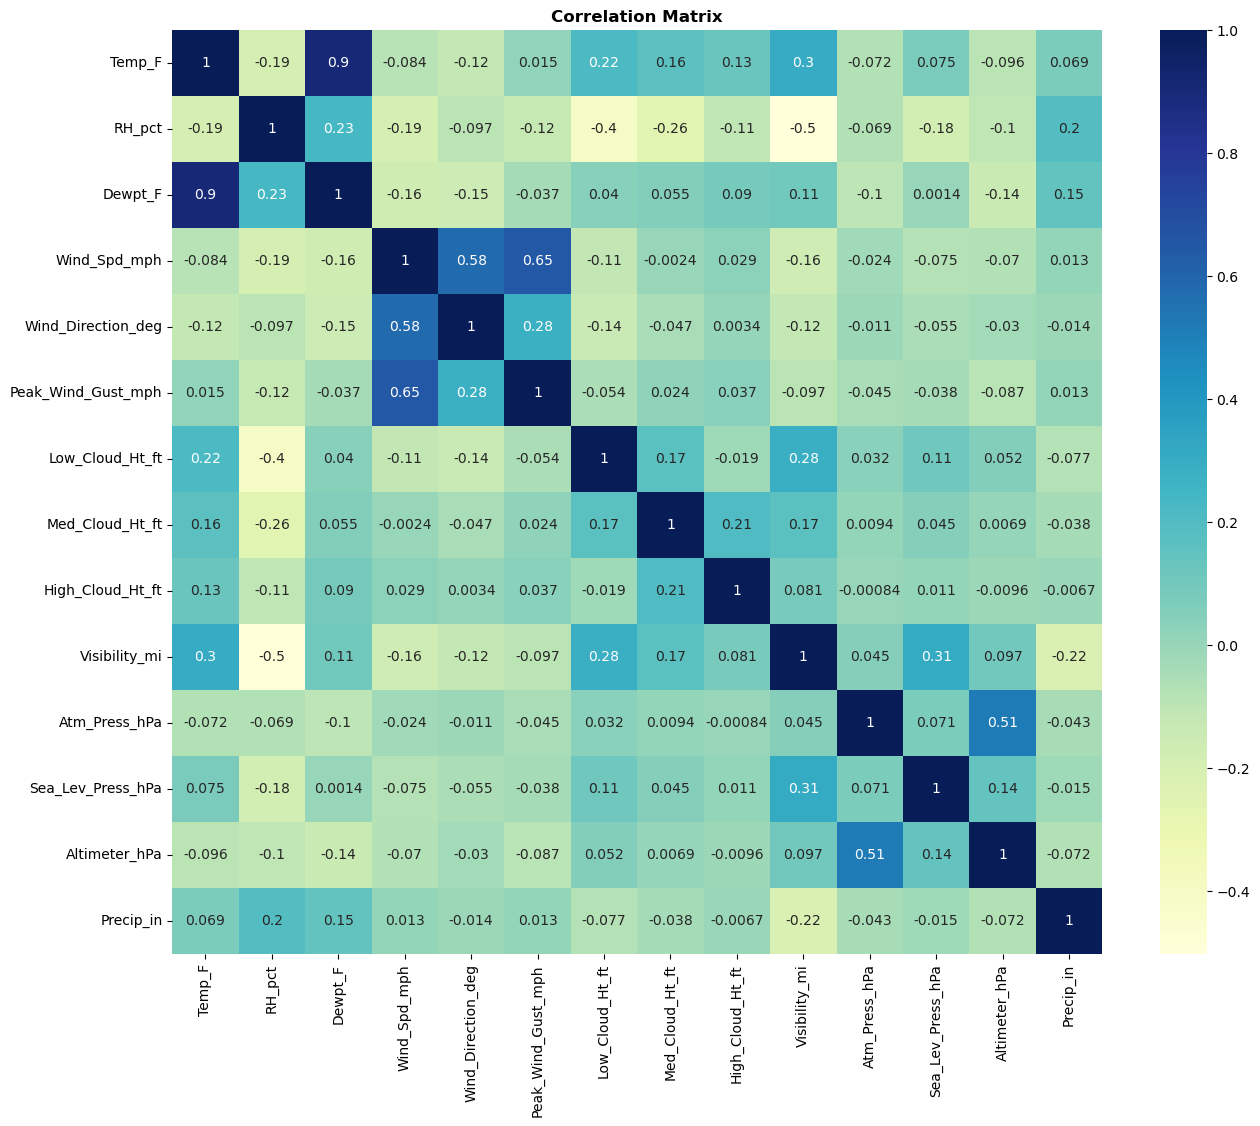

In [19]:
# Correlation 
correlation_matrix = les.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

In [20]:
les = les.drop(['Dewpt_F', 'Peak_Wind_Gust_mph'], axis=1)
les = les.reset_index(drop=True)

# Information about dataset shape
print('Total observations: ', les.shape[0])
print('Total number of features: ', les.shape[1])
les.head()

Total observations:  16040
Total number of features:  17


,Date_UTC,Time_UTC,Date_CST,Time_CST,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,rain
0,2006-10-01,14:00,2006-10-01,14:00,60.0,49.0,10.0,270.0,3600.0,0.0,0.0,10.0,994.7,1017.8,1017.6,0.0,none
1,2006-10-01,15:00,2006-10-01,15:00,60.0,47.0,3.0,0.0,0.0,0.0,0.0,10.0,994.7,1017.7,1017.6,0.0,none
2,2006-10-01,16:00,2006-10-01,16:00,59.0,55.0,6.0,40.0,0.0,0.0,0.0,10.0,994.7,1017.8,1017.6,0.0,none
3,2006-10-01,17:00,2006-10-01,17:00,55.0,71.0,0.0,0.0,0.0,0.0,0.0,10.0,994.7,1017.8,1017.6,0.0,none
4,2006-10-01,18:00,2006-10-01,18:00,50.0,82.0,0.0,0.0,8000.0,0.0,0.0,10.0,994.7,1017.9,1017.6,0.0,none


In [21]:
les['Datetime_UTC'] = pd.to_datetime(les['Date_UTC'] + ' ' + les['Time_UTC'])
les.set_index('Datetime_UTC', inplace=True)
les.drop(['Date_UTC', 'Time_UTC'], axis=1, inplace=True)

In [22]:
les.drop(['Date_CST', 'Time_CST'], axis=1, inplace=True)

In [23]:
numerical_columns = ['Temp_F', 'RH_pct', 'Wind_Direction_deg', 'Low_Cloud_Ht_ft',
       'Med_Cloud_Ht_ft', 'High_Cloud_Ht_ft', 'Visibility_mi', 'Atm_Press_hPa',
       'Sea_Lev_Press_hPa', 'Altimeter_hPa']

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
les[numerical_columns] = scaler.fit_transform(les[numerical_columns])

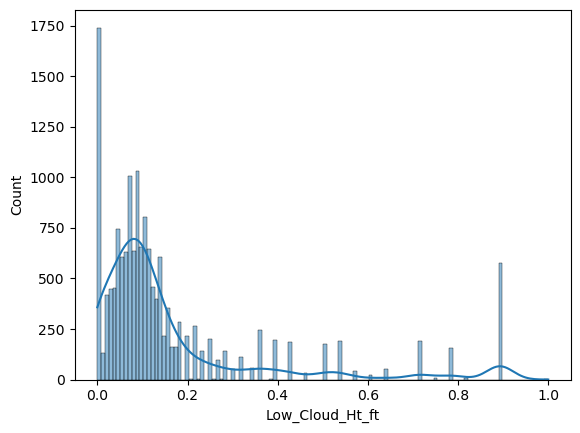

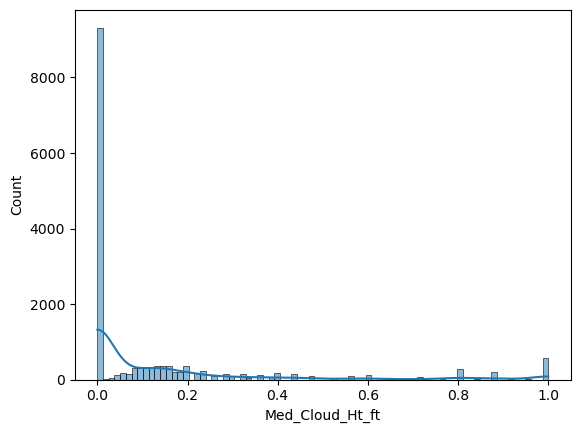

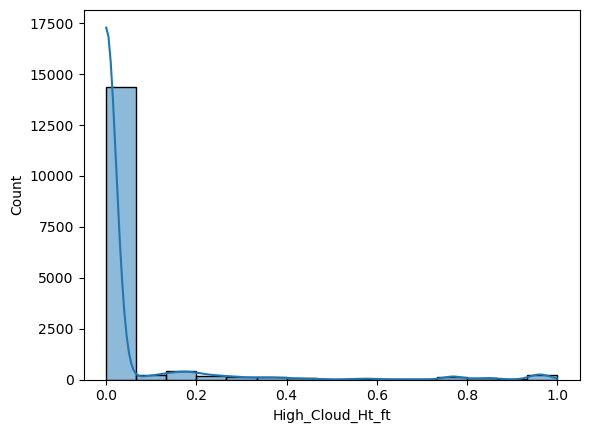

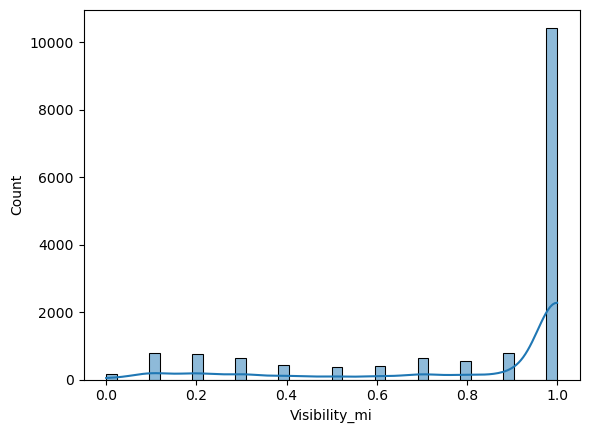

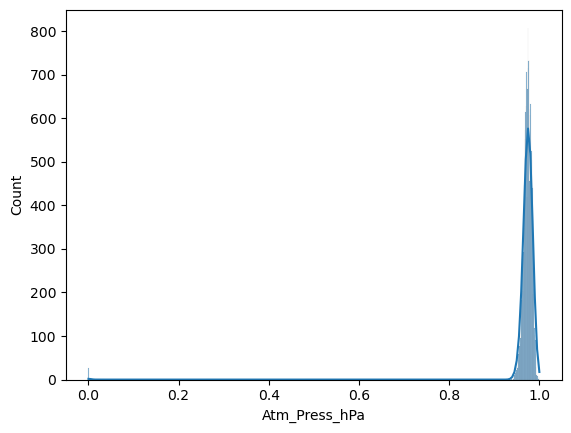

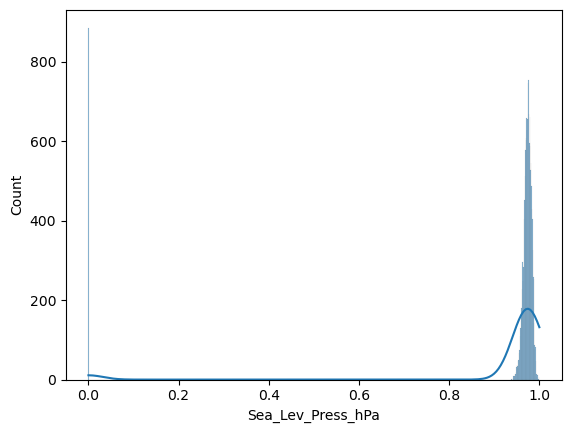

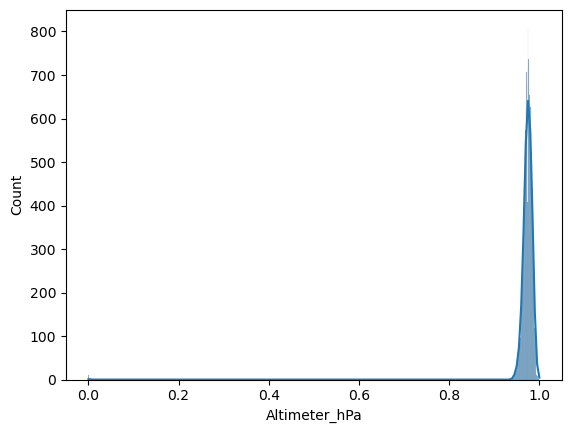

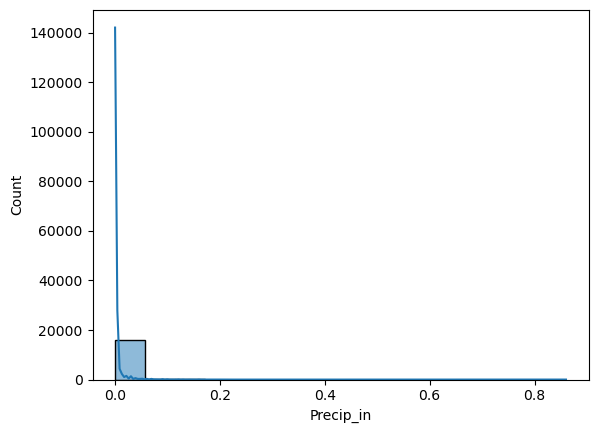

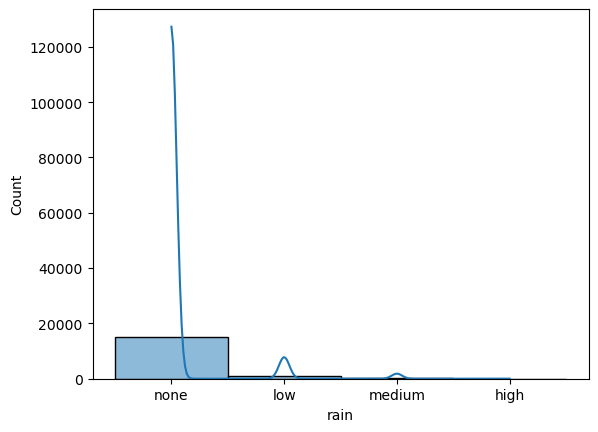

In [25]:
def distPlot(data):
    cols = data.columns[4:]
    for col in cols:
        sns.histplot(data[col], kde=True)
        plt.show()
        
distPlot(les)

In [26]:
les["Precip_in"].value_counts()

0.00    14827
0.01      509
0.02      195
0.03      142
0.04       69
0.05       48
0.06       31
0.07       31
0.09       19
0.08       16
0.10       14
0.12       10
0.15        6
0.16        6
0.13        6
0.14        6
0.11        5
0.17        3
0.32        2
0.19        2
0.18        2
0.20        2
0.26        1
0.28        1
0.36        1
0.86        1
0.66        1
0.74        1
0.22        1
0.21        1
Name: Precip_in, dtype: int64

<Axes: xlabel='rain', ylabel='count'>

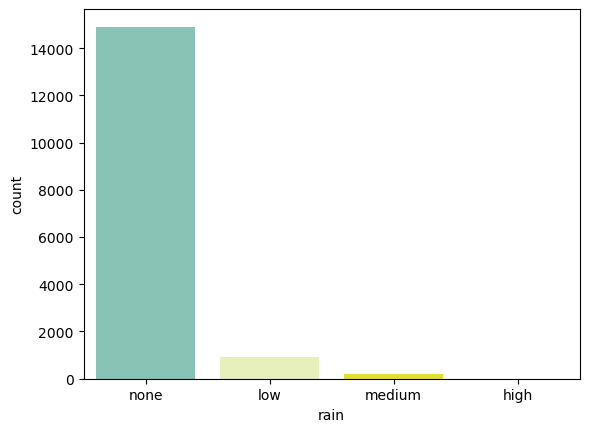

In [27]:
sns.countplot(x = les['rain'], palette=["#7fcdbb", "#edf8b1","#fffa17", "#41ee33"])

In [30]:
les.head()

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,rain
Datetime_UTC,,,,,,,,,,,,,
2006-10-01 14:00:00,0.728155,0.49,10.0,0.750000,0.128571,0.0,0.0,1.0,0.976249,0.975278,0.976302,0.0,none
2006-10-01 15:00:00,0.728155,0.47,3.0,0.000000,0.000000,0.0,0.0,1.0,0.976249,0.975182,0.976302,0.0,none
2006-10-01 16:00:00,0.718447,0.55,6.0,0.111111,0.000000,0.0,0.0,1.0,0.976249,0.975278,0.976302,0.0,none
2006-10-01 17:00:00,0.679612,0.71,0.0,0.000000,0.000000,0.0,0.0,1.0,0.976249,0.975278,0.976302,0.0,none
2006-10-01 18:00:00,0.631068,0.82,0.0,0.000000,0.285714,0.0,0.0,1.0,0.976249,0.975374,0.976302,0.0,none


In [40]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


# Convert categorical labels to integers
label_mapping = {'none': 0, 'low': 1, 'moderate': 2, 'high': 3}
les['rain'] = les['rain'].map(label_mapping)

# Scale your feature columns as needed
scaler = MinMaxScaler()
feature_columns = les.columns[:-1]  # assuming last column is the target
les[feature_columns] = scaler.fit_transform(les[feature_columns])

def prepare_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:i+sequence_length, :-1].values)
        y.append(data.iloc[i+sequence_length, -1])
    X = np.array(X)
    y = to_categorical(np.array(y), num_classes=4)  # One-hot encoding
    return X, y

# Adjust sequence length as needed
sequence_length = 24  # You can experiment with this
X, y = prepare_sequences(les, sequence_length)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/utils/np_utils.py:62: RuntimeWarning: invalid value encountered in cast
  y = np.array(y, dtype="int")


In [41]:
def build_model(input_shape, num_classes):
    model = Sequential([
        LSTM(50, input_shape=input_shape, return_sequences=True),
        Dropout(0.3),
        LSTM(50),
        Dropout(0.2),
        Dense(100, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Prepare the model
input_shape = (sequence_length, X.shape[2])
model = build_model(input_shape, num_classes=4)

In [42]:
# Manual split
split_point = int(len(X) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [43]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

Epoch 1/30
361/361 [==============================] - 18s 31ms/step - loss: nan - accuracy: 0.9419 - val_loss: nan - val_accuracy: 0.9314
Epoch 2/30
361/361 [==============================] - 11s 31ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 3/30
361/361 [==============================] - 12s 34ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 4/30
361/361 [==============================] - 12s 33ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 5/30
361/361 [==============================] - 14s 38ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 6/30
361/361 [==============================] - 11s 31ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 7/30
361/361 [==============================] - 14s 38ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 8/30
361/361 [==============

In [44]:
# Reverse the label mapping
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

In [45]:
def predict_rainfall(model, data, sequence_length, forecast_hours):
    # Get the last 'sequence_length' data points, predict the next 'forecast_hours' hours
    last_sequence = data.iloc[-sequence_length:].drop('rain', axis=1)
    last_sequence = scaler.transform(last_sequence)  # Apply the same scaling as training
    last_sequence = last_sequence.reshape(1, sequence_length, -1)
    
    prediction = model.predict(last_sequence)
    predicted_category_indices = np.argmax(prediction, axis=1)
    return [reverse_label_mapping[predicted_index] for predicted_index in predicted_category_indices]


In [46]:
predictions_7h = predict_rainfall(model, les, sequence_length, 7)
predictions_24h = predict_rainfall(model, les, sequence_length, 24)
predictions_72h = predict_rainfall(model, les, sequence_length, 72)

print("Predictions for the next 7 hours:", predictions_7h)
print("Predictions for the next 24 hours:", predictions_24h)
print("Predictions for the next 72 hours:", predictions_72h)

1/1 [==============================] - 0s 37ms/step
Predictions for the next 7 hours: ['none']
Predictions for the next 24 hours: ['none']
Predictions for the next 72 hours: ['none']


In [47]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

def prepare_sequences(data, input_sequence_length, forecast_length, num_classes):
    X, y = [], []
    for i in range(len(data) - input_sequence_length - forecast_length + 1):
        X.append(data.iloc[i:(i + input_sequence_length), :-1].values)
        future_steps = data.iloc[i + input_sequence_length:i + input_sequence_length + forecast_length, -1].values
        y.append(to_categorical(future_steps, num_classes=num_classes))  # Each future step is one-hot encoded
    X = np.array(X)
    y = np.array(y)  # y should now have shape [num_samples, forecast_length, num_classes]
    return X, y

# # Set forecast_length to 24 or 7 or 72 as per your requirement
forecast_length = 24  # for example


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed

def build_sequence_model(input_shape, num_classes, output_sequence_length):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        TimeDistributed(Dense(num_classes, activation='softmax'))  # assuming classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [49]:
input_sequence_length = 24  # Number of hours of past data
forecast_length = 24 # Predict up to 7 hours ahead

X, y = prepare_sequences(les, input_sequence_length, forecast_length, num_classes=4)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/utils/np_utils.py:62: RuntimeWarning: invalid value encountered in cast
  y = np.array(y, dtype="int")


In [50]:
from sklearn.model_selection import train_test_split

# Manual split
split_point = int(len(X) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

model = build_sequence_model((input_sequence_length, X.shape[2]), 4, forecast_length)
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)


Epoch 1/30
360/360 [==============================] - 17s 36ms/step - loss: nan - accuracy: 0.9370 - val_loss: nan - val_accuracy: 0.9314
Epoch 2/30
360/360 [==============================] - 11s 30ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 3/30
360/360 [==============================] - 11s 31ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 4/30
360/360 [==============================] - 9s 26ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 5/30
360/360 [==============================] - 11s 31ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 6/30
360/360 [==============================] - 12s 33ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 7/30
360/360 [==============================] - 11s 30ms/step - loss: nan - accuracy: 0.9435 - val_loss: nan - val_accuracy: 0.9314
Epoch 8/30
360/360 [===============

In [51]:
import numpy as np

# Assuming 'les' is your DataFrame and the 'rain' column is the target to be dropped for input
input_sequence_length = 24  # Or whatever length was used to train the model

# Prepare the last available sequence as model input
last_sequence = les.iloc[-input_sequence_length:].drop('rain', axis=1)
last_sequence = last_sequence.values.reshape(1, input_sequence_length, -1)

# Model prediction
predictions = model.predict(last_sequence)

# Assuming you have a dictionary to convert class indices back to names
# Example: {0: 'none', 1: 'low', 2: 'moderate', 3: 'high'}
class_names = ['none', 'low', 'moderate', 'high']

# Convert probability distributions to predicted class indices
predicted_labels = np.argmax(predictions, axis=-1)  # This collapses the class dimension to select the most likely class

# Print predictions
print("Predicted rainfall categories for each forecast hour:")
for i, label_index in enumerate(predicted_labels[0]):  # Iterate over each hour's prediction
    print(f"Hour {i+1}: {class_names[label_index]}")

1/1 [==============================] - 4s 4s/step
Predicted rainfall categories for each forecast hour:
Hour 1: none
Hour 2: none
Hour 3: none
Hour 4: none
Hour 5: none
Hour 6: none
Hour 7: none
Hour 8: none
Hour 9: none
Hour 10: none
Hour 11: none
Hour 12: none
Hour 13: none
Hour 14: none
Hour 15: none
Hour 16: none
Hour 17: none
Hour 18: none
Hour 19: none
Hour 20: none
Hour 21: none
Hour 22: none
Hour 23: none
Hour 24: none


# The model seems to be experiencing an issue commonly known as "loss explosion" or "loss divergence." This occurs when the loss function, which is typically a measure of error between predicted and actual values, returns NaN  values during training.